In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("solar_weather.csv", index_col='Time', parse_dates=True)

In [4]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196776 entries, 2017-01-01 00:00:00 to 2022-08-31 17:45:00
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Energy delta[Wh]        196776 non-null  int64  
 1   GHI                     196776 non-null  float64
 2   temp                    196776 non-null  float64
 3   pressure                196776 non-null  int64  
 4   humidity                196776 non-null  int64  
 5   wind_speed              196776 non-null  float64
 6   rain_1h                 196776 non-null  float64
 7   snow_1h                 196776 non-null  float64
 8   clouds_all              196776 non-null  int64  
 9   isSun                   196776 non-null  int64  
 10  sunlightTime            196776 non-null  int64  
 11  dayLength               196776 non-null  int64  
 12  SunlightTime/daylength  196776 non-null  float64
 13  weather_type            196776 non-null 

In [6]:
# Check the datatype of the index column (make sure it is datetime)
df.index.dtype

dtype('<M8[ns]')

In [7]:
# Describe the data
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [8]:
# Any null values?
df.isnull().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

# Data Visualization using some basic graphs

### Histograms to check for the distribution of the data and potential outliers

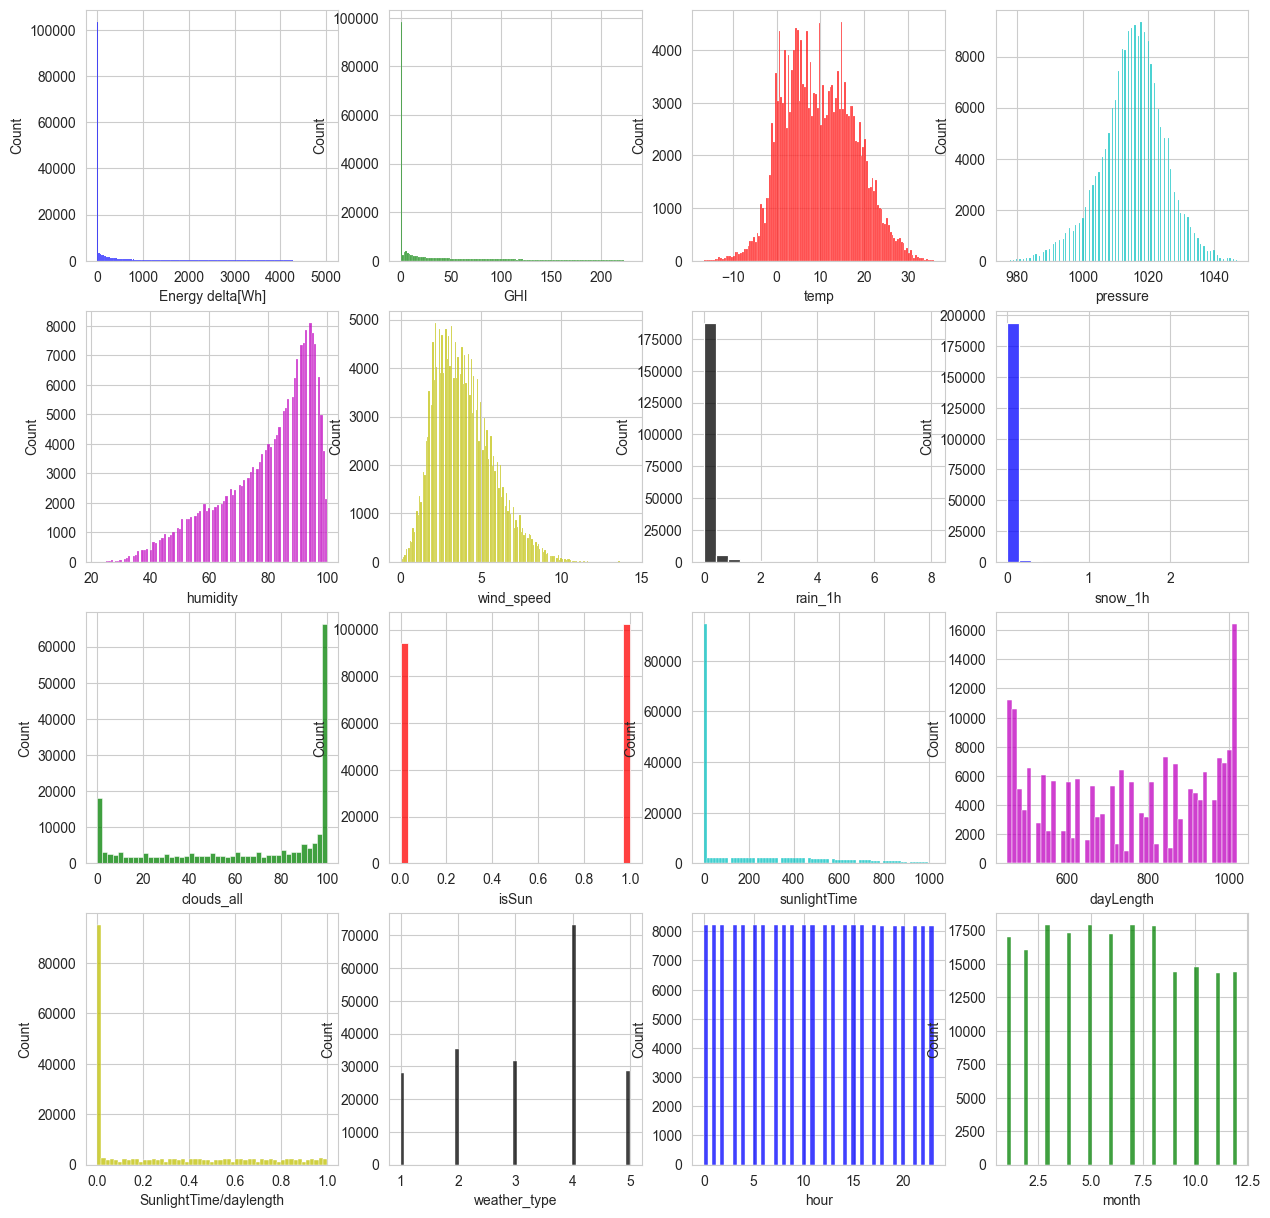

In [9]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
colours = "bgrcmykbgrcmykbg"

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and create separate plots
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], color=colours[i])

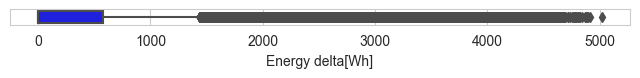

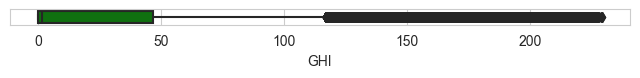

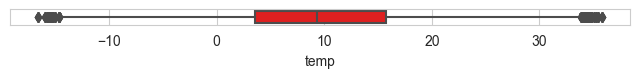

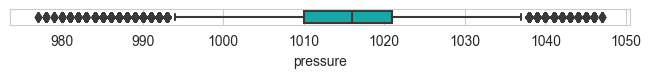

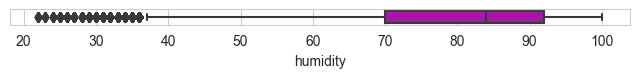

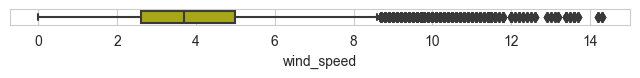

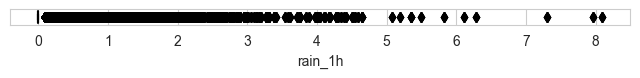

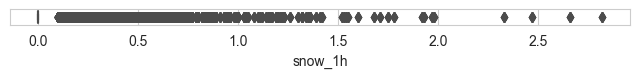

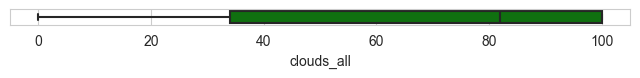

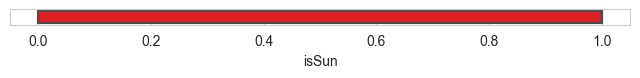

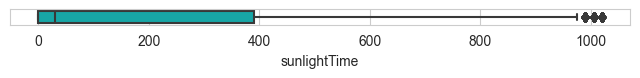

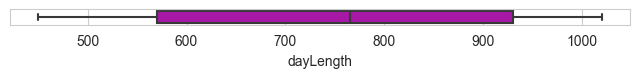

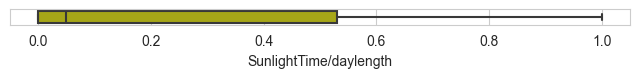

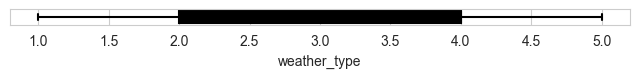

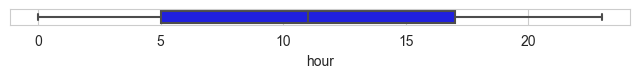

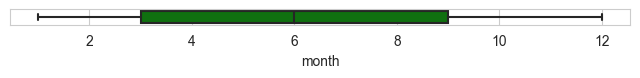

In [10]:
# Boxplots of all the data
colours = "bgrcmykbgrcmykbg"
i=0
for column in df:    
    fig,ax = plt.subplots(figsize=(8,0.2))
    sns.boxplot(data=df, x=column, color= colours[i]) 
    i+=1

### Now graph energy consumption (mean for each weather type) versus weather type to look for patterns - type 1 is the highest and type 5 is the lowest

Text(0.5, 1.0, 'Energy Delta by Weather Type')

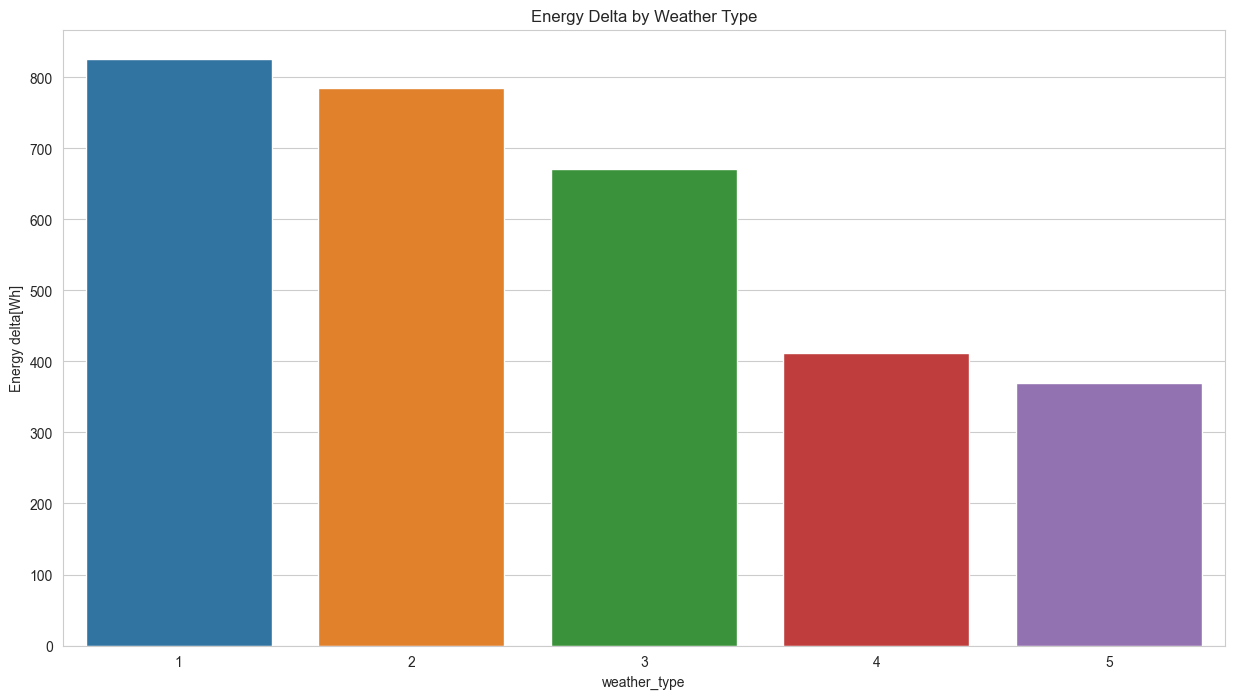

In [11]:
df_wx_type = df.groupby('weather_type').mean() 
sns.barplot(data=df_wx_type, x=df_wx_type.index, y= 'Energy delta[Wh]')
plt.title('Energy Delta by Weather Type')

##### Month wise

Text(0.5, 1.0, 'Energy Delta by Month')

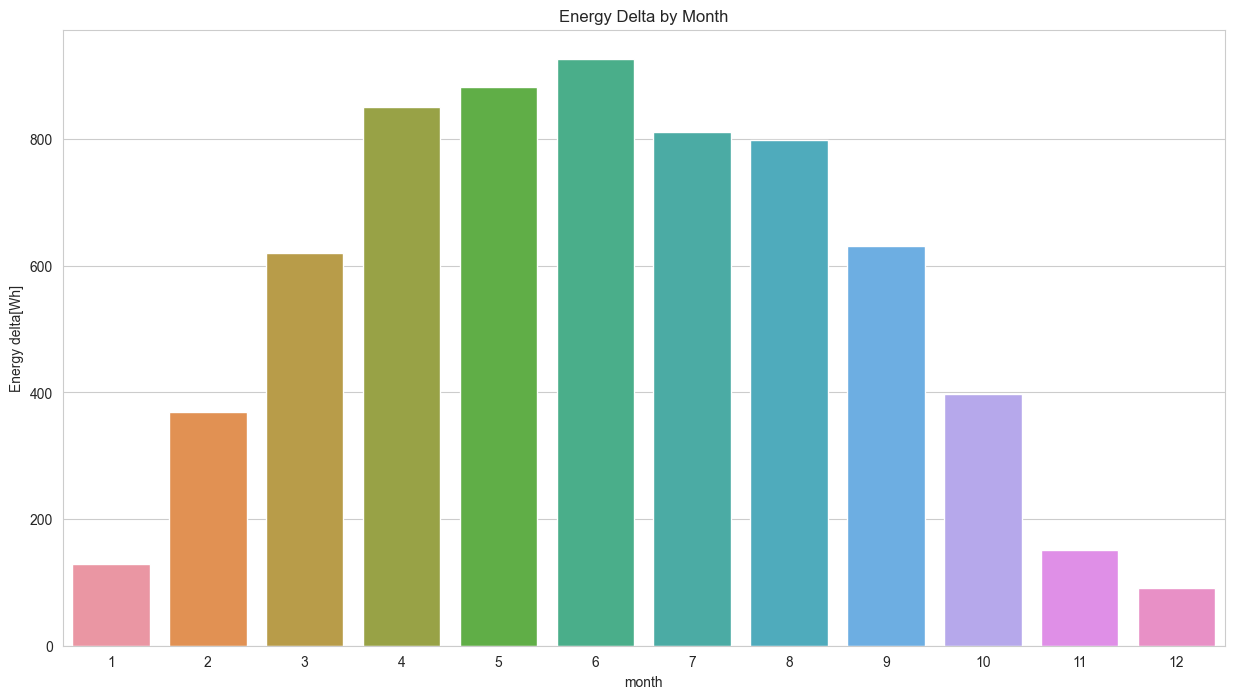

In [12]:
df_month = df.groupby('month').mean() 
sns.barplot(data=df_month, x=df_month.index, y='Energy delta[Wh]')
plt.title('Energy Delta by Month')

##### Hour wise

Text(0.5, 1.0, 'Energy Delta by Hour')

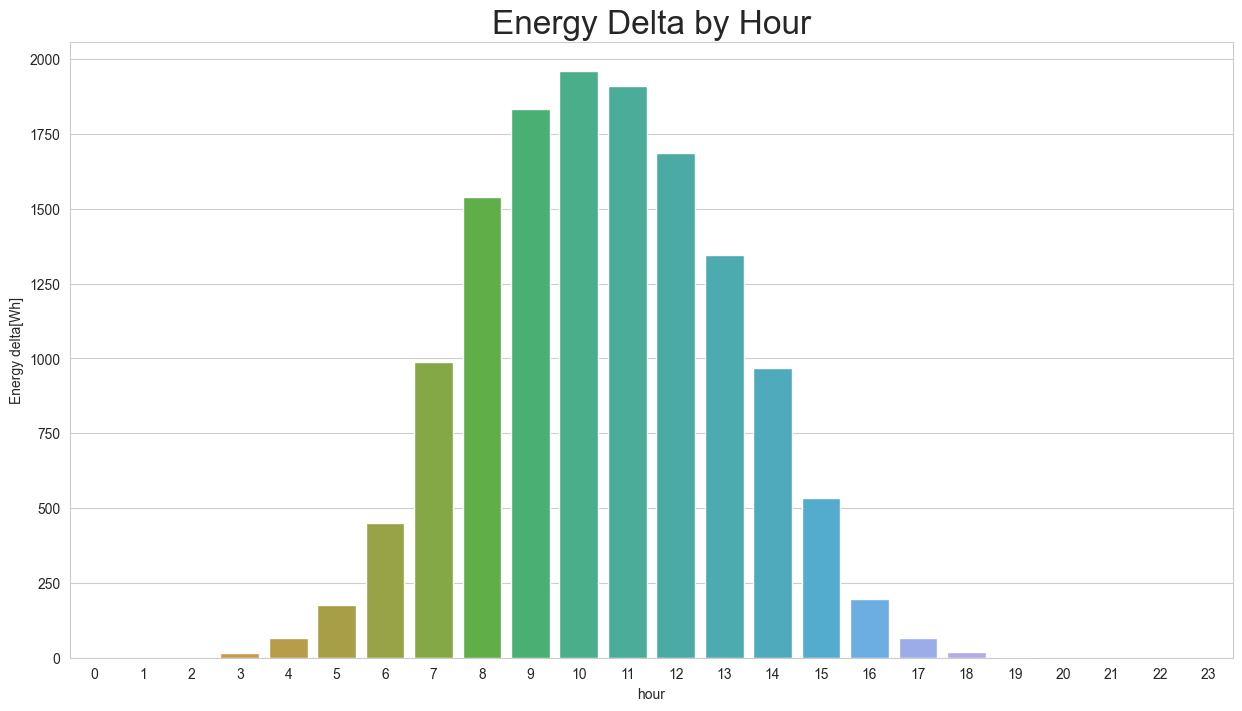

In [13]:
df_hour = df.groupby('hour').mean() 
sns.barplot(data=df_hour, x=df_hour.index, y='Energy delta[Wh]')
plt.title('Energy Delta by Hour', fontsize=24)

Text(0.5, 1.0, 'Range of Energy Delta values per hour')

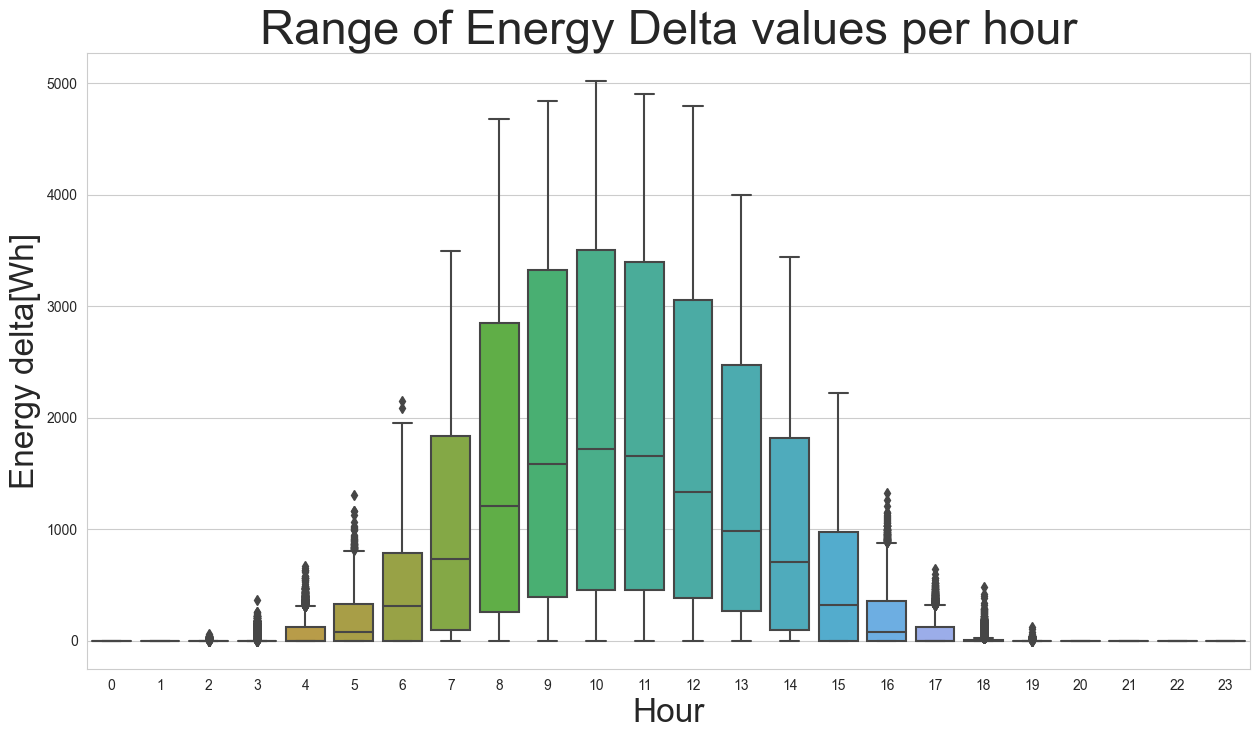

In [14]:
# Now to visualise amount of Energy Delta by hour
sns.boxplot(x=df.index.hour, y='Energy delta[Wh]', data=df) 
plt.ylabel('Energy delta[Wh]', fontsize=24)
plt.xlabel('Hour', fontsize=24)
plt.title("Range of Energy Delta values per hour", fontsize=34)

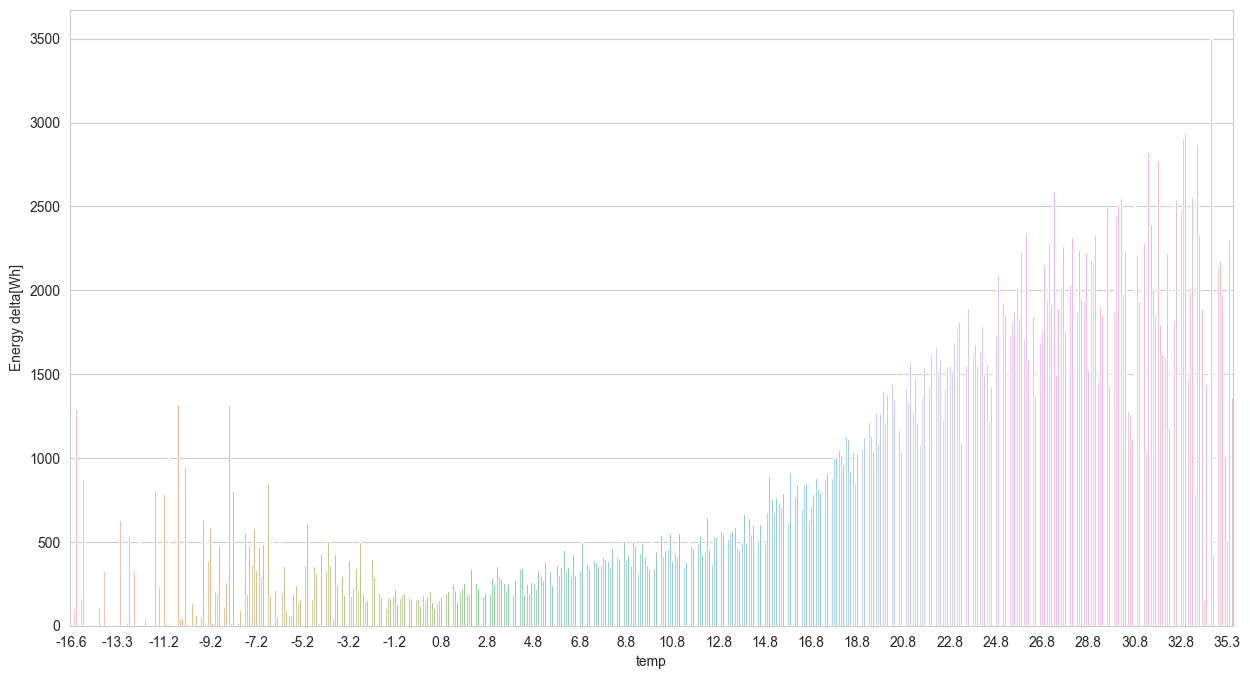

In [15]:
# More energy is used in warmer temperatures indicating greater use of air conditioners to cool rather than heaters to warm.
fig, ax = plt.subplots(1, 1, figsize=(15,8))

df_temp = df.groupby('temp').mean() 
sns.barplot(data=df_temp, x=df_temp.index, y='Energy delta[Wh]')

# only put labels every 20th label - roughly every 2 degrees - saves x axis being so cluttered
for i, label in enumerate(ax.get_xticklabels()):
    if i % 20 != 0:  # Display every twentieth label
        label.set_visible(False)

##### Correlation Matrix

<Axes: >

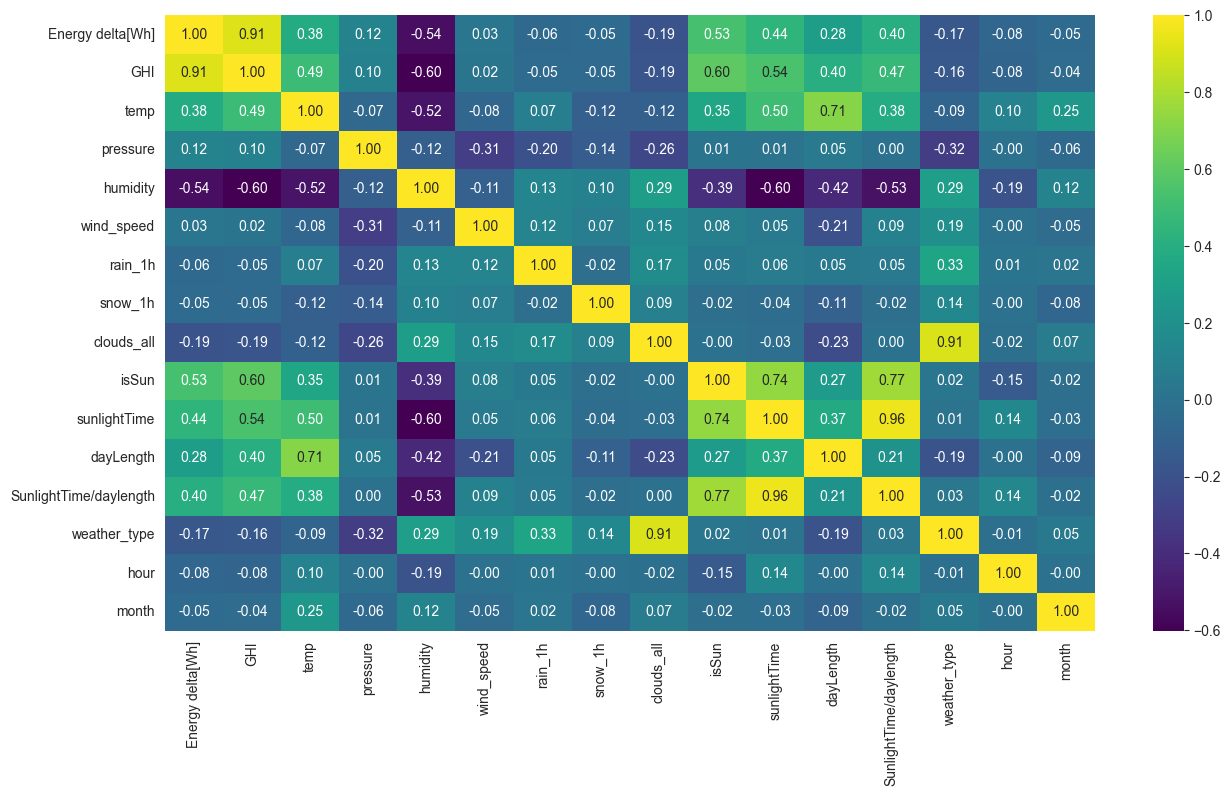

In [17]:
# get correlations for all columns 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")

In [35]:
# from the correlation variable created above let's get the top 3 (using absolute value to get either positive or negative) correlations with Energy delta

corr[['Energy delta[Wh]']].abs().sort_values(by='Energy delta[Wh]', axis=0, ascending=False)

,Energy delta[Wh]
Energy delta[Wh],1.000000
GHI,0.914619
humidity,0.544407
isSun,0.526952
sunlightTime,0.437296
SunlightTime/daylength,0.402523
temp,0.378554
dayLength,0.280695
clouds_all,0.190241
weather_type,0.170046
